#WIL PROJECT - WEEK 1

Submitted By:

Krishna Babu Menon (C0856683)

Karnav Patel

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the preference csv file from the google drive

In [ ]:
pref_df = pd.read_csv('/content/drive/MyDrive/krishna/Luigi_Preferences.csv')
pref_df.head()

,User ID,Age,Nationality,Residence,Cuisine Preference,Recipe Selection
0,1,26,Italian,Canada,Italian,"Lasagna, Pizza"
1,2,26,Italian,Canada,Italian,Spaghetti Carbonara
2,3,26,Italian,Canada,Italian,Tiramisu
3,4,26,Italian,Canada,Italian,Risotto
4,5,26,Italian,Canada,Italian,Panna Cotta


checking the shape

In [ ]:
pref_df.shape

(15, 6)

##I - Clean the provided dataset about Luigi’s preferences, handle any missing values, and ensure it is in a suitable format for analysis and model building.

###Check for missing value

In [ ]:
pref_df.isnull().sum()

User ID               0
Age                   0
Nationality           0
Residence             0
Cuisine Preference    0
Recipe Selection      0
dtype: int64

Checking value count for each column

In [ ]:
pref_df['Age'].value_counts()

26    15
Name: Age, dtype: int64

In [ ]:
pref_df['Nationality'].value_counts()

Italian    15
Name: Nationality, dtype: int64

In [ ]:
pref_df['Residence'].value_counts()

Canada    15
Name: Residence, dtype: int64

In [ ]:
pref_df['Cuisine Preference'].value_counts()

Italian    15
Name: Cuisine Preference, dtype: int64

In [ ]:
pref_df['Recipe Selection'].value_counts()

Lasagna, Pizza         1
Spaghetti Carbonara    1
Tiramisu               1
Risotto                1
Panna Cotta            1
Gnocchi                1
Ravioli                1
Osso Buco              1
Minestrone Soup        1
Cannoli                1
Caprese Salad          1
Biscotti               1
Focaccia               1
Ossobuco               1
Eggplant Parmigiana    1
Name: Recipe Selection, dtype: int64

From above one particular entry is repeated twice which is Osso Buco and Ossobuco. Typically they both are same. Imputing the same

In [ ]:
pref_df['Recipe Selection'] = pref_df['Recipe Selection'].replace('Osso Buco', 'Ossobuco')

In [ ]:
pref_df['Recipe Selection'].value_counts()

Ossobuco               2
Lasagna, Pizza         1
Spaghetti Carbonara    1
Tiramisu               1
Risotto                1
Panna Cotta            1
Gnocchi                1
Ravioli                1
Minestrone Soup        1
Cannoli                1
Caprese Salad          1
Biscotti               1
Focaccia               1
Eggplant Parmigiana    1
Name: Recipe Selection, dtype: int64

### Check for data format

In [ ]:
pref_df.dtypes

User ID                int64
Age                    int64
Nationality           object
Residence             object
Cuisine Preference    object
Recipe Selection      object
dtype: object

In [ ]:
pref_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User ID             15 non-null     int64 
 1   Age                 15 non-null     int64 
 2   Nationality         15 non-null     object
 3   Residence           15 non-null     object
 4   Cuisine Preference  15 non-null     object
 5   Recipe Selection    15 non-null     object
dtypes: int64(2), object(4)
memory usage: 848.0+ bytes


### checking for duplicate entry

In [ ]:
pref_df.duplicated().any()

False

In [ ]:
pref_df.drop_duplicates(inplace=True)

In [ ]:
pref_df.shape

(15, 6)

## II - Analyze the cleaned dataset.

#### Visualisation

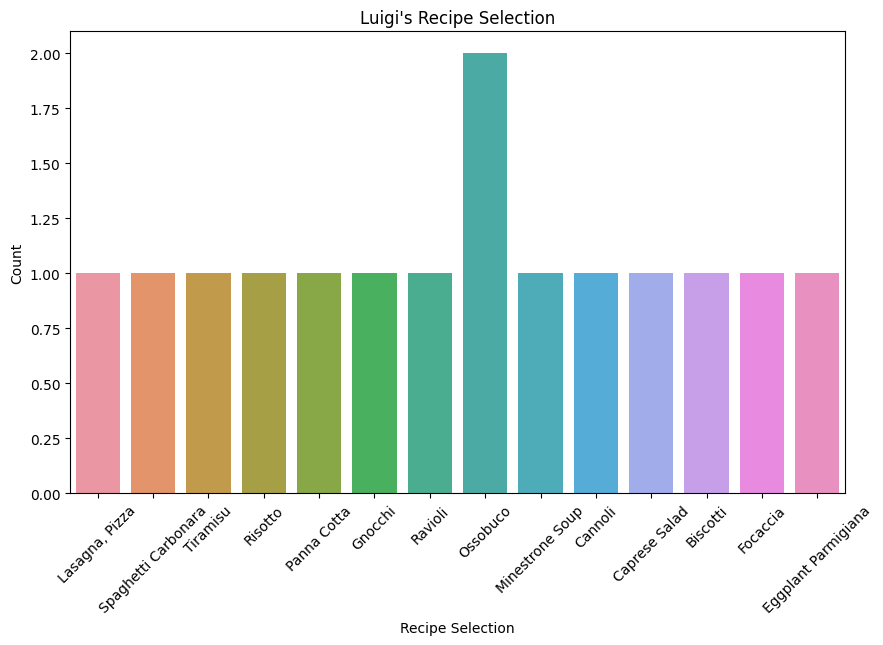

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pref_df, x='Recipe Selection')
plt.title("Luigi's Recipe Selection")
plt.xlabel("Recipe Selection")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
recipe_counts = pref_df['Recipe Selection'].value_counts()

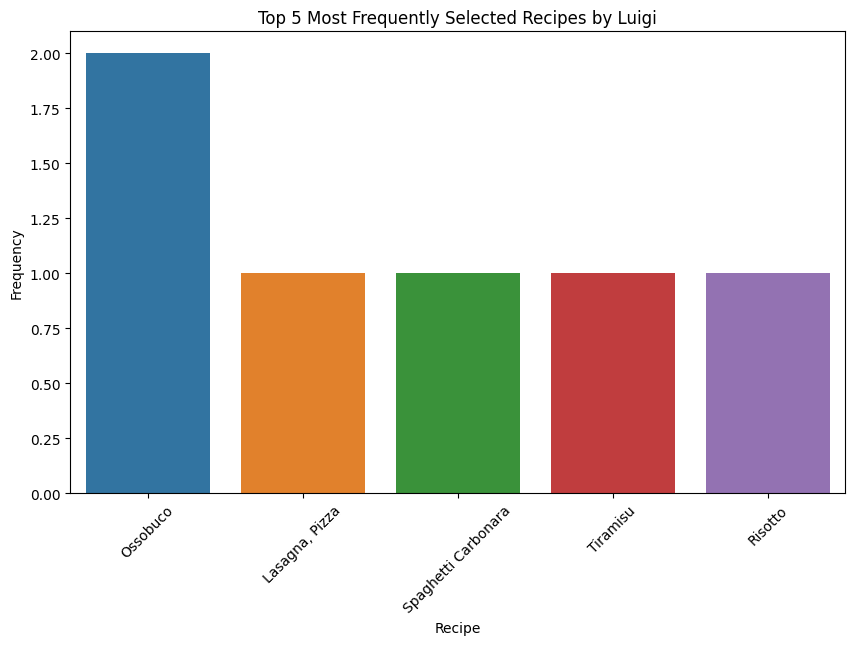

In [ ]:
top_n = 5
plt.figure(figsize=(10, 6))
sns.barplot(x=recipe_counts.head(top_n).index, y=recipe_counts.head(top_n).values)
plt.title(f"Top {top_n} Most Frequently Selected Recipes by Luigi")
plt.xlabel("Recipe")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

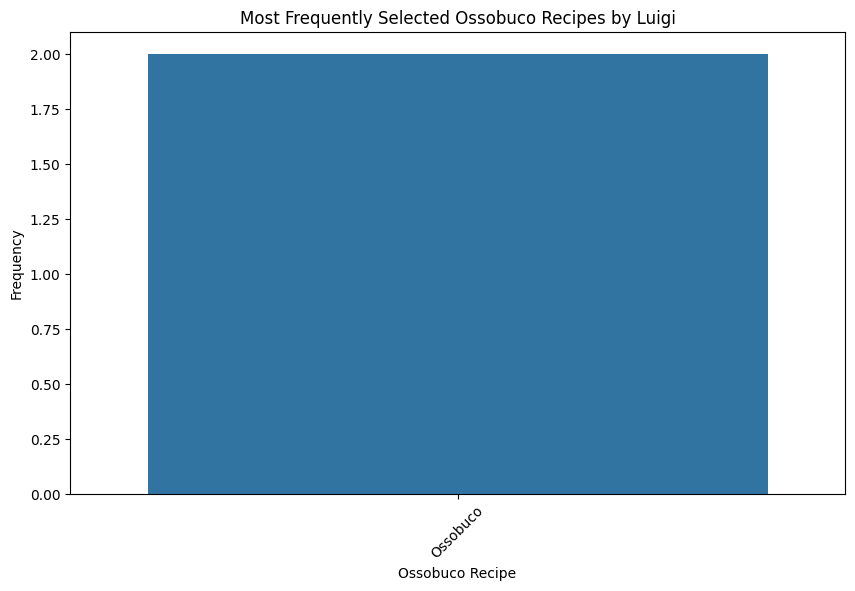

In [ ]:
ossobuco_recipes = pref_df[pref_df['Recipe Selection'].str.contains("Ossobuco")]
ossobuco_counts = ossobuco_recipes['Recipe Selection'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ossobuco_counts.head(top_n).index, y=ossobuco_counts.head(top_n).values)
plt.title(f"Most Frequently Selected Ossobuco Recipes by Luigi")
plt.xlabel("Ossobuco Recipe")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

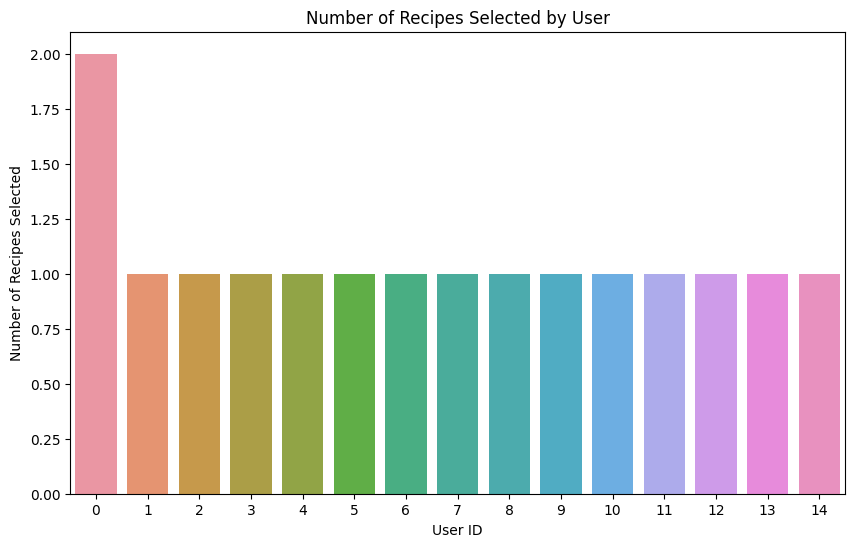

In [ ]:
recipe_counts = pref_df['Recipe Selection'].apply(lambda x: len(x.split(',')))

# Create a colorful bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=data_df['User ID'], y=recipe_counts)
plt.xlabel('User ID')
plt.ylabel('Number of Recipes Selected')
plt.title('Number of Recipes Selected by User')
plt.show()

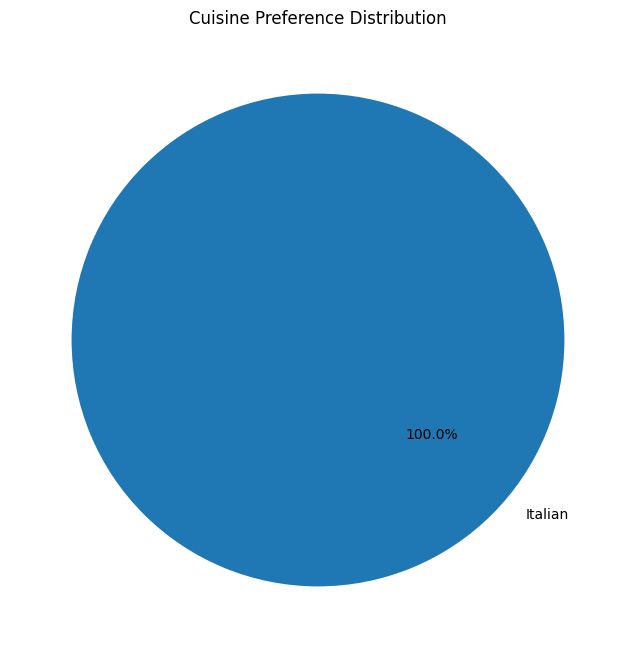

In [ ]:
# Pie chart of cuisine preference
cuisine_preference_counts = pref_df['Cuisine Preference'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cuisine_preference_counts, labels=cuisine_preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cuisine Preference Distribution')
plt.show()

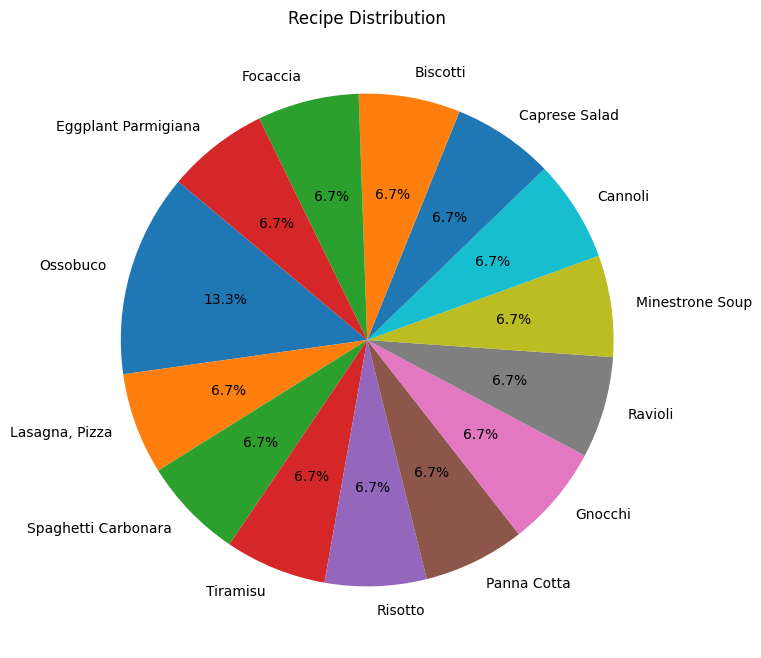

In [ ]:
# Pie chart of cuisine preference
recipe_preference_counts = pref_df['Recipe Selection'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(recipe_preference_counts, labels=recipe_preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Recipe Distribution')
plt.show()

In [ ]:
data_df = pref_df

In [ ]:
data_df.head()

,User ID,Age,Nationality,Residence,Cuisine Preference,Recipe Selection
0,1,26,Italian,Canada,Italian,"Lasagna, Pizza"
1,2,26,Italian,Canada,Italian,Spaghetti Carbonara
2,3,26,Italian,Canada,Italian,Tiramisu
3,4,26,Italian,Canada,Italian,Risotto
4,5,26,Italian,Canada,Italian,Panna Cotta


### TF-IDF Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_df['Recipe Selection'])

### Cosine Similarity

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
recipe_indices = pd.Series(data_df.index, index=data_df['Recipe Selection']).drop_duplicates()

### Recommendation system - I

In [ ]:
def get_content_based_recommendations(recipe_name):
    idx = data_df[data_df['Recipe Selection'] == recipe_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get the top 5 similar recipes
    recommended_indices = [i[0] for i in sim_scores]
    return data_df['Recipe Selection'].iloc[recommended_indices]

In [ ]:
#Get content-based recommendations based on Luigi's last recipe
luigi_last_recipe = 'Spaghetti Carbonara'
content_based_recommendations = get_content_based_recommendations(luigi_last_recipe)
print("Content-Based Recommendations:")
print(content_based_recommendations)

Content-Based Recommendations:
0    Lasagna, Pizza
2          Tiramisu
3           Risotto
4       Panna Cotta
5           Gnocchi
Name: Recipe Selection, dtype: object


### Recommendation system - II

In [ ]:
new_data = pref_df

In [ ]:
# Encode User ID and Recipe Selection using LabelEncoder
user_encoder = LabelEncoder()
recipe_encoder = LabelEncoder()
new_data['User ID'] = user_encoder.fit_transform(new_data['User ID'])
new_data['Recipe Selection'] = recipe_encoder.fit_transform(new_data['Recipe Selection'])

In [ ]:
# Split data into training and testing sets
train, test = train_test_split(new_data, test_size=0.2, random_state=42)

In [ ]:
# Define the neural collaborative filtering model
num_users = len(new_data['User ID'].unique())
num_recipes = len(new_data['Recipe Selection'].unique())

In [ ]:
user_input = Input(shape=(1,), name='user_input')
recipe_input = Input(shape=(1,), name='recipe_input')

In [ ]:
user_embedding = Embedding(input_dim=num_users, output_dim=16)(user_input)
recipe_embedding = Embedding(input_dim=num_recipes, output_dim=16)(recipe_input)

In [ ]:
user_flatten = Flatten()(user_embedding)
recipe_flatten = Flatten()(recipe_embedding)

In [ ]:
concat = Concatenate()([user_flatten, recipe_flatten])

In [ ]:
dense_layer = Dense(128, activation='relu')(concat)
output = Dense(1, activation='sigmoid')(dense_layer)

In [ ]:
model = Model(inputs=[user_input, recipe_input], outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit([train['User ID'], train['Recipe Selection']], np.ones(len(train)), batch_size=64, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6845 - accuracy: 0.9167
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6777 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6709 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6642 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6577 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6512 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6447 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6381 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6315 - accuracy: 1.0000


### Model Evaluate

In [ ]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate([train['User ID'], train['Recipe Selection']], np.ones(len(train)))
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

1/1 [==============================] - 1s 563ms/step - loss: 0.6249 - accuracy: 1.0000
Training Loss: 0.6249142289161682, Training Accuracy: 1.0


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([test['User ID'], test['Recipe Selection']], np.ones(len(test)))
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1/1 [==============================] - 0s 29ms/step - loss: 0.6423 - accuracy: 1.0000
Test Loss: 0.6422528624534607, Test Accuracy: 1.0


In [ ]:
# Make predictions on the test set
test_predictions = model.predict([test['User ID'], test['Recipe Selection']])

1/1 [==============================] - 0s 108ms/step


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_predictions, np.ones(len(test)))
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.22457606893381646


In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.4738945757590146


####Make recommendations

In [ ]:
#Make recommendations for user ID 1 and a list of recipe IDs
user_id = 1
recipe_ids = [0, 1, 2, 3, 4]  # Recipe IDs are encoded, e.g., 0 corresponds to 'Lasagna, Pizza'

In [ ]:
# Convert user ID and recipe IDs to numpy arrays for prediction
user_id_array = np.array([user_id] * len(recipe_ids))
recipe_ids_array = np.array(recipe_ids)

In [ ]:
# Make recommendations
predictions = model.predict([user_id_array, recipe_ids_array])

1/1 [==============================] - 0s 120ms/step


In [ ]:
# Sort the predictions in descending order to get recommended recipe IDs
sorted_indices = np.argsort(predictions[:, 0])[::-1]
recommended_recipe_ids = [recipe_encoder.inverse_transform([recipe_ids[i]])[0] for i in sorted_indices]

In [ ]:
print("Recommended Recipe IDs:")
print(recommended_recipe_ids)

Recommended Recipe IDs:
['Caprese Salad', 'Cannoli', 'Eggplant Parmigiana', 'Focaccia', 'Biscotti']


#####second recommendation

In [ ]:
#Make recommendations for user ID 1 and a list of recipe IDs
user_id = 2
recipe_ids = [5, 6, 7, 8, 9]  # Recipe IDs are encoded, e.g., 0 corresponds to 'Lasagna, Pizza'

In [ ]:
# Convert user ID and recipe IDs to numpy arrays for prediction
user_id_array = np.array([user_id] * len(recipe_ids))
recipe_ids_array = np.array(recipe_ids)

In [ ]:
# Make recommendations
predictions = model.predict([user_id_array, recipe_ids_array])

1/1 [==============================] - 0s 23ms/step


In [ ]:
# Sort the predictions in descending order to get recommended recipe IDs
sorted_indices = np.argsort(predictions[:, 0])[::-1]
recommended_recipe_ids = [recipe_encoder.inverse_transform([recipe_ids[i]])[0] for i in sorted_indices]

In [ ]:
print("Recommended Recipe IDs:")
print(recommended_recipe_ids)

Recommended Recipe IDs:
['Ossobuco', 'Panna Cotta', 'Gnocchi', 'Lasagna, Pizza', 'Minestrone Soup']
